In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score



In [3]:
# Load datasets
customers = pd.read_csv("C:/Users/santh/Downloads/Customers.csv")
products = pd.read_csv('C:/Users/santh/Downloads/Products.csv')
transactions = pd.read_csv('C:/Users/santh/Downloads/Transactions.csv')


In [4]:
# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


Davies-Bouldin Index: 0.9467058109377833


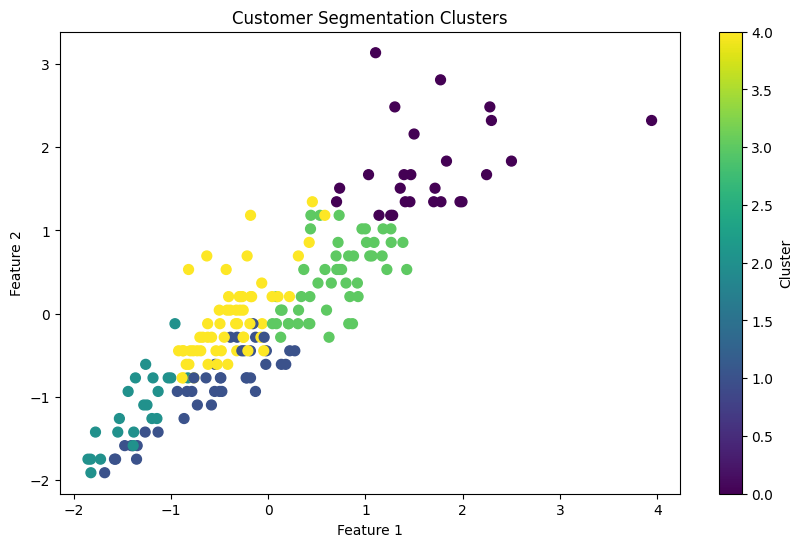

In [6]:

clustering_data = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price_x': 'mean'
}).reset_index()

# Standardize features
scaler = StandardScaler()
clustering_features = scaler.fit_transform(clustering_data.drop(columns=['CustomerID']))

# Apply K-Means Clustering
n_clusters = 5  # You can tune this value
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_features)

# Evaluate clustering
db_index = davies_bouldin_score(clustering_features, clustering_data['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(clustering_features[:, 0], clustering_features[:, 1], c=clustering_data['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segmentation Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

# Save clustering results
clustering_data.to_csv('C:/Users/Santh/Downloads/Customer_Segments.csv', index=False)
